# Proyek Analisis Data: Air Quality Dataset

* **Nama:** Haifa Syabina
* **Email:** haifasyabina.coll@gmail.com
* **ID Dicoding:** Haifa Syabina

# Menentukan Pertanyaan Bisnis

1. Bagaimana kondisi kualitas udara diukur menggunakan PM2.5 setiap tahunnya di setiap daerah?
2. Bagaimana pengaruh curah hujan terhadap PM2.5 di setiap daerah setiap tahunnya?

# Import Semua Packages/Library yang Digunakan

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Data Wrangling

## Gathering Data 

In [3]:
changping_df = pd.read_csv("data/PRSA_Data_Changping_20130301-20170228.csv")
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [4]:
aotizhongxing_df = pd.read_csv("data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aotizhongxing_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [5]:
dingling_df = pd.read_csv("data/PRSA_Data_Dingling_20130301-20170228.csv")
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [6]:
dongsi_df = pd.read_csv("data/PRSA_Data_Dongsi_20130301-20170228.csv")
dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [7]:
guanyuan_df = pd.read_csv("data/PRSA_Data_Guanyuan_20130301-20170228.csv")
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [8]:
gucheng_df = pd.read_csv("data/PRSA_Data_Gucheng_20130301-20170228.csv")
gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [9]:
huairou_df = pd.read_csv("data/PRSA_Data_Huairou_20130301-20170228.csv")
huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [10]:
nongzhanguan_df = pd.read_csv("data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [11]:
shunyi_df = pd.read_csv("data/PRSA_Data_Shunyi_20130301-20170228.csv")
shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [12]:
tiantan_df = pd.read_csv("data/PRSA_Data_Tiantan_20130301-20170228.csv")
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [13]:
wanliu_df = pd.read_csv("data/PRSA_Data_Wanliu_20130301-20170228.csv")
wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [14]:
wanshouxigong_df = pd.read_csv("data/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
wanshouxigong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


Terdapat dataset yang berasal dari 12 stasiun yang memiliki berbagai parameter kualitas udara, tekanan, curah hujan, tahun, bulan, hari, dan jamnya.

## Assessing Data

In [15]:
def dataset_summary(df):
    
    print("\n -- Info --")
    print(df.info())
    
    print("\n --Missing Value--")
    print(df.isnull().sum())
    
    print("\n -- Duplicated Row --")
    print("Jumlah duplikat:", df.duplicated().sum())
    
    print("\n -- Describe --")
    print(df.describe())
    
    return dataset_summary

In [16]:
print(dataset_summary(aotizhongxing_df))


 -- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

 --Missing Value--
No            0
year          

In [17]:
aotizhongxing_df.year.value_counts()

year
2016    8784
2015    8760
2014    8760
2013    7344
2017    1416
Name: count, dtype: int64

In [18]:
def dist_plot(df, cols):
    ncols = 3
    nrows = len(cols) // ncols + 1
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*3))
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        sns.boxplot(df, x=col, ax=axes[i])
        axes[i].set_title(f"{col} distribution")
        axes[i].set_xlabel(col)
        
    plt.tight_layout()
    plt.show()

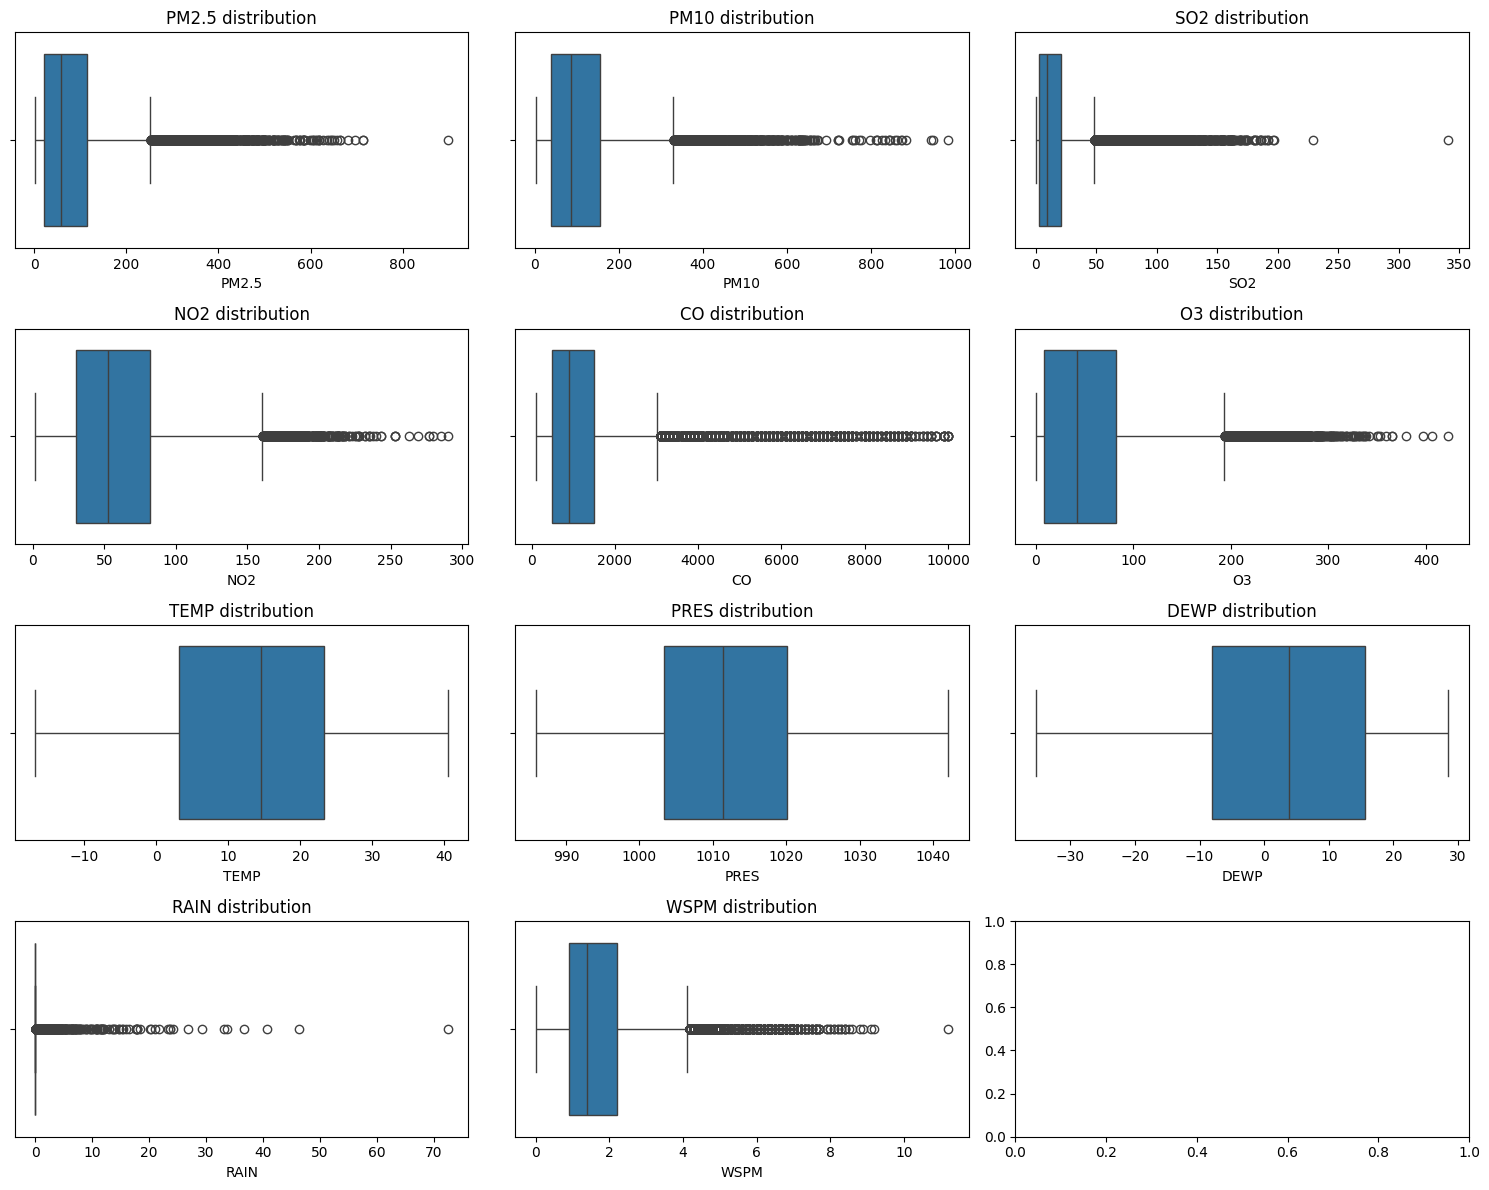

In [19]:
dist_plot(aotizhongxing_df, ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'])

In [20]:
dataset_summary(changping_df)


 -- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

 --Missing Value--
No            0
year          

<function __main__.dataset_summary(df)>

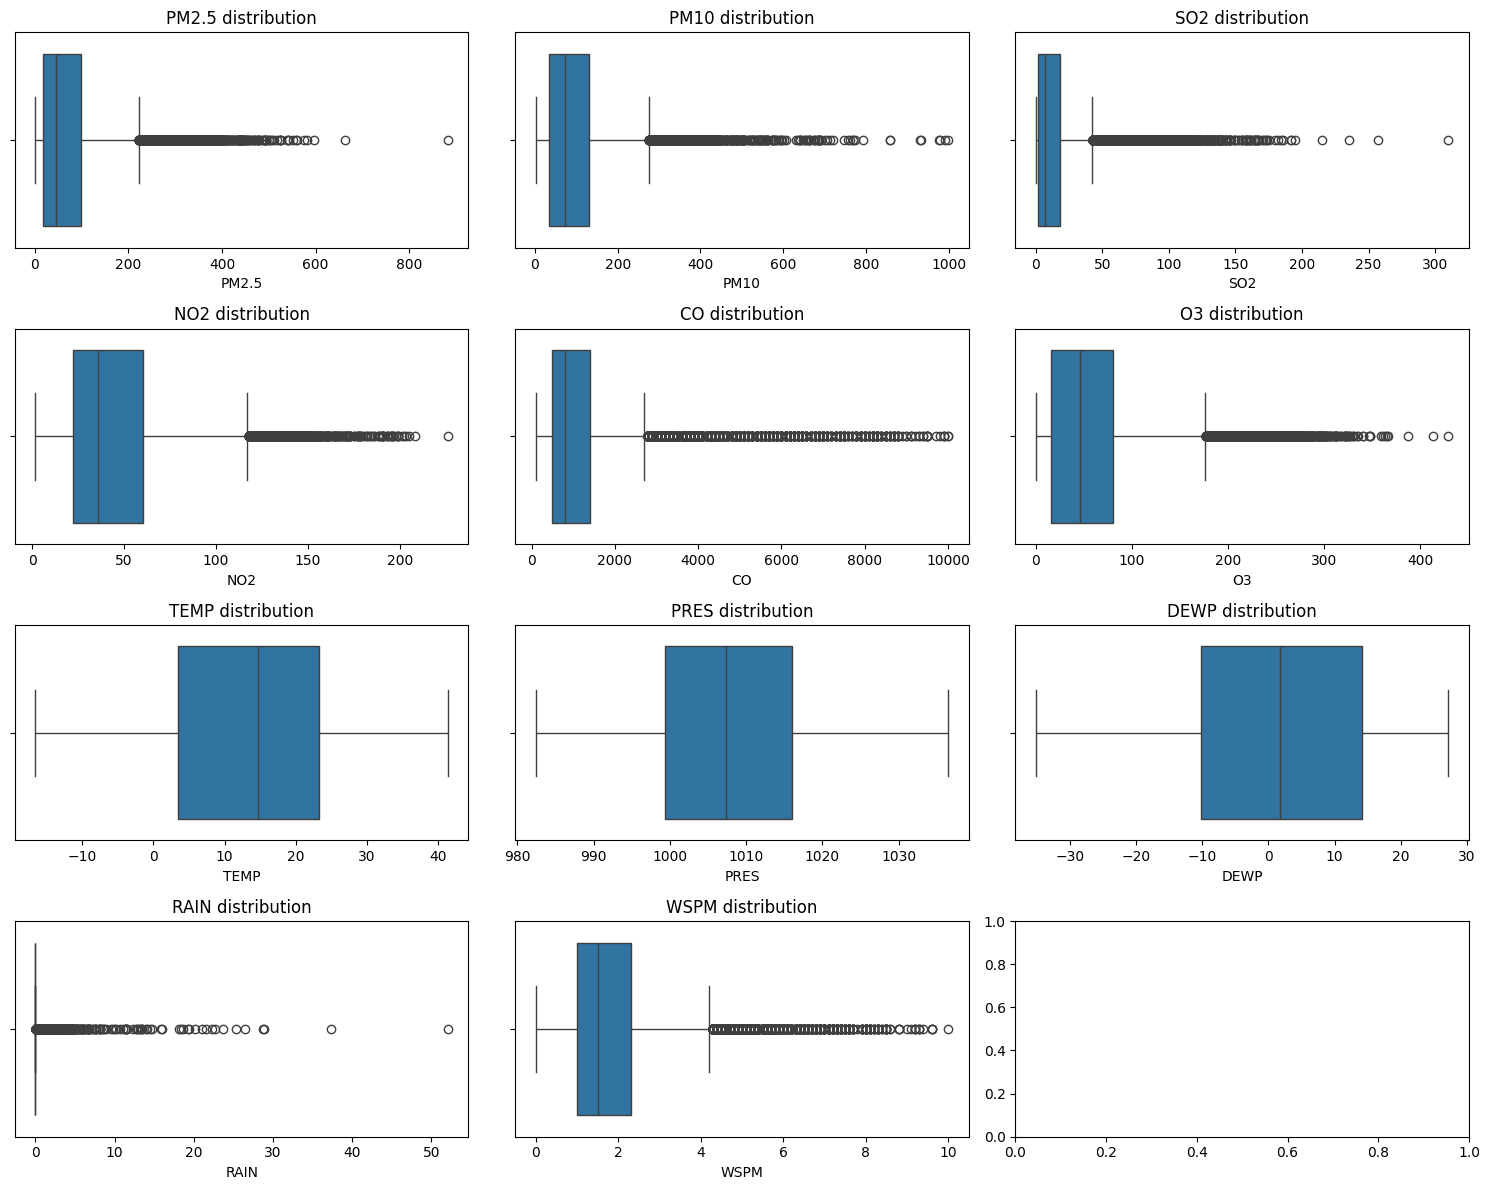

In [21]:
dist_plot(changping_df, ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'])

In [22]:
dataset_summary(dingling_df)


 -- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

 --Missing Value--
No            0
year          

<function __main__.dataset_summary(df)>

In [23]:
dataset_summary(dongsi_df)


 -- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

 --Missing Value--
No            0
year          

<function __main__.dataset_summary(df)>

In [24]:
dataset_summary(guanyuan_df)


 -- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

 --Missing Value--
No            0
year          

<function __main__.dataset_summary(df)>

In [25]:
dataset_summary(gucheng_df)


 -- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

 --Missing Value--
No            0
year          

<function __main__.dataset_summary(df)>

In [26]:
dataset_summary(huairou_df)


 -- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

 --Missing Value--
No            0
year          

<function __main__.dataset_summary(df)>

In [27]:
dataset_summary(nongzhanguan_df)


 -- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

 --Missing Value--
No            0
year          

<function __main__.dataset_summary(df)>

In [28]:
dataset_summary(shunyi_df)


 -- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

 --Missing Value--
No            0
year          

<function __main__.dataset_summary(df)>

In [29]:
dataset_summary(tiantan_df)


 -- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

 --Missing Value--
No            0
year          

<function __main__.dataset_summary(df)>

In [30]:
dataset_summary(wanliu_df)


 -- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

 --Missing Value--
No            0
year          

<function __main__.dataset_summary(df)>

In [31]:
dataset_summary(wanshouxigong_df)


 -- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

 --Missing Value--
No            0
year          

<function __main__.dataset_summary(df)>

**Insight**

Terdapat banyak missing value pada setiap dataset, yaitu pada kolom PM2.5 PM10, SO2, NO2, CO, O3, TEMP, PRESS, DEWP, RAIN, wd, WSPM. Pada kasus ini tentunya kita harus menangani missing_value ini dengan hati-hati. menghilangkan missing value tidak disarankan karena banyaknya data yang nantinya akan hilang. Maka kita bisa menggunakan pendekatan lain dengan imputation. 

## Cleaning Data

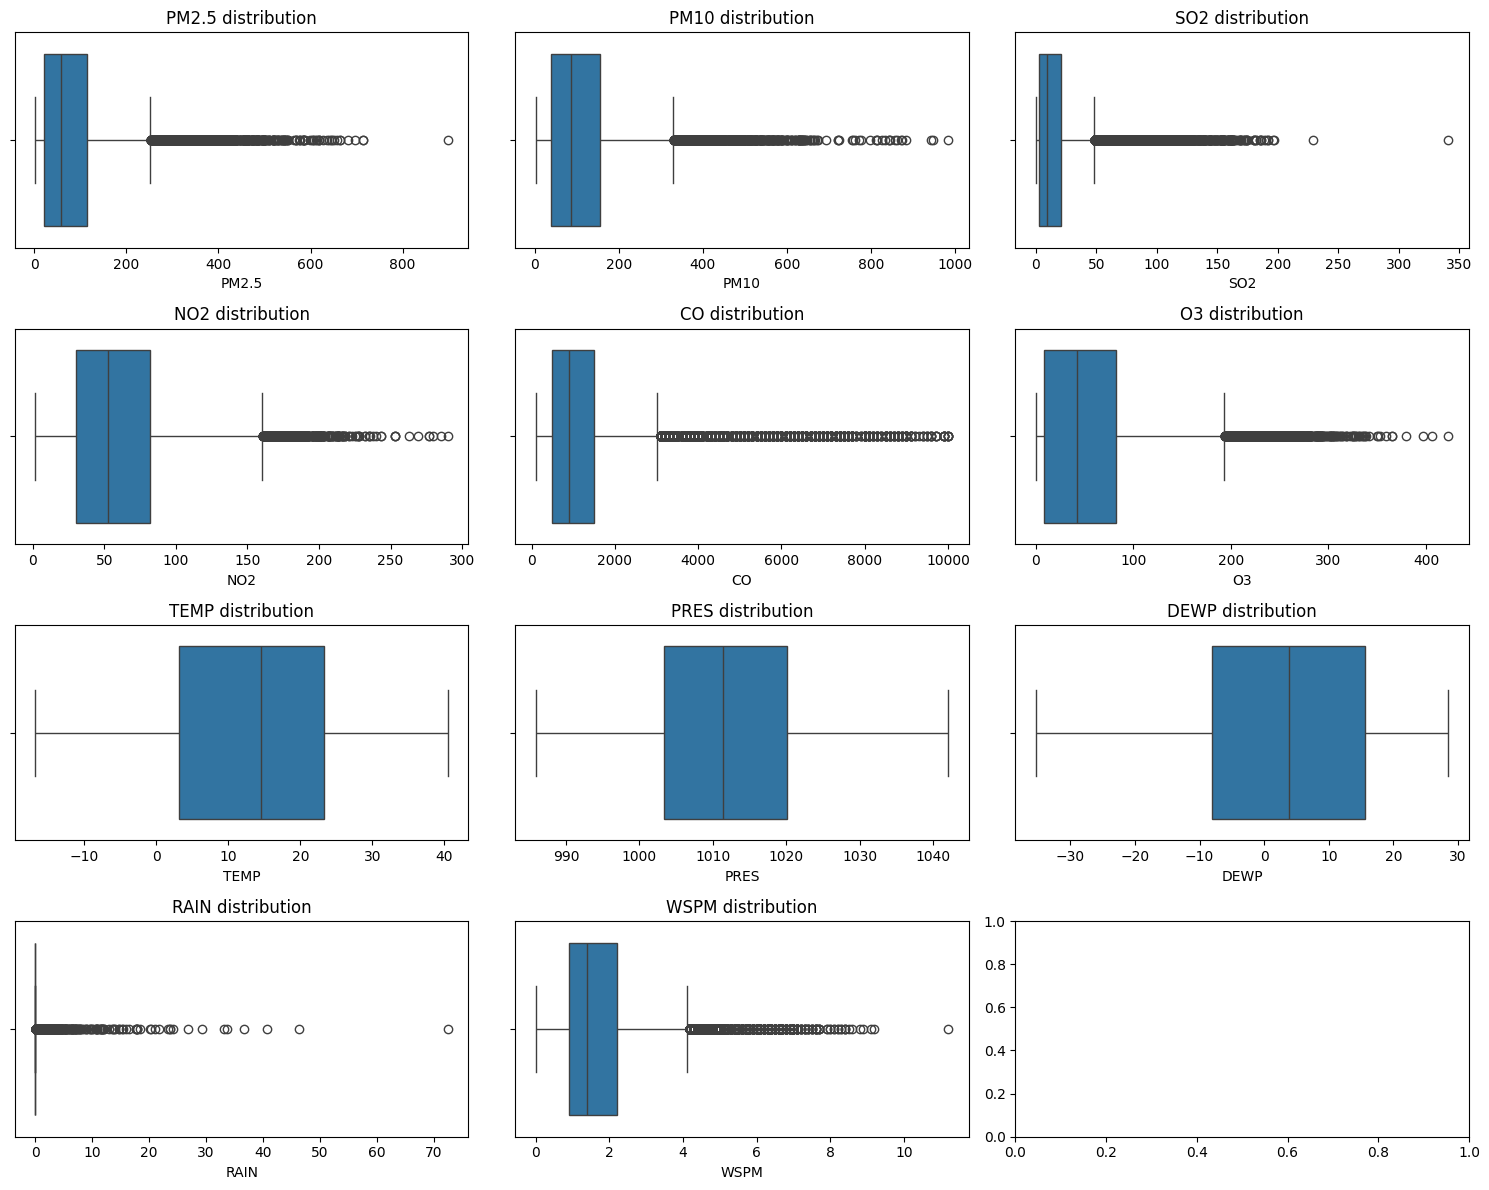

In [32]:
dist_plot(aotizhongxing_df, ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'])

In [33]:
def handle_missing_values(df):
    for column in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']:
        if column in df.columns:
            df[column].interpolate(method='linear', limit_direction = 'forward', inplace=True)

In [34]:
handle_missing_values(aotizhongxing_df)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\3112282333.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(method='linear', limit_direction = 'forward', inplace=True)


In [35]:
aotizhongxing_df.wd.fillna(value=aotizhongxing_df.wd.mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\1688077452.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aotizhongxing_df.wd.fillna(value=aotizhongxing_df.wd.mode()[0], inplace=True)


In [36]:
aotizhongxing_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [37]:
handle_missing_values(changping_df)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\3112282333.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(method='linear', limit_direction = 'forward', inplace=True)


In [38]:
changping_df.isnull().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
dtype: int64

In [39]:
changping_df.wd.fillna(value=changping_df.wd.mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\431502267.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  changping_df.wd.fillna(value=changping_df.wd.mode()[0], inplace=True)


In [40]:
changping_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [41]:
handle_missing_values(dingling_df)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\3112282333.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(method='linear', limit_direction = 'forward', inplace=True)


In [42]:
dingling_df.isnull().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          2
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         140
WSPM         0
station      0
dtype: int64

In [43]:
dingling_df.wd.fillna(value=dingling_df.wd.mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\4120738743.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling_df.wd.fillna(value=dingling_df.wd.mode()[0], inplace=True)


In [44]:
dingling_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        2
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [45]:
dingling_df[dingling_df.NO2.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling


In [46]:
dingling_df['NO2'].fillna(method='bfill', inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\922673808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling_df['NO2'].fillna(method='bfill', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\922673808.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dingling_df['NO2'].fillna(method='bfill', inplace=True)


In [47]:
dingling_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [48]:
handle_missing_values(dongsi_df)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\3112282333.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(method='linear', limit_direction = 'forward', inplace=True)


In [49]:
dongsi_df.wd.fillna(value=dongsi_df.wd.mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\2550027437.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dongsi_df.wd.fillna(value=dongsi_df.wd.mode()[0], inplace=True)


In [50]:
dongsi_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [51]:
handle_missing_values(guanyuan_df)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\3112282333.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(method='linear', limit_direction = 'forward', inplace=True)


In [52]:
guanyuan_df.wd.fillna(value=guanyuan_df.wd.mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\2269181396.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  guanyuan_df.wd.fillna(value=guanyuan_df.wd.mode()[0], inplace=True)


In [53]:
guanyuan_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [54]:
handle_missing_values(gucheng_df)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\3112282333.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(method='linear', limit_direction = 'forward', inplace=True)


In [55]:
gucheng_df.wd.fillna(value=gucheng_df.wd.mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\125102856.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gucheng_df.wd.fillna(value=gucheng_df.wd.mode()[0], inplace=True)


In [56]:
gucheng_df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2        20
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64

In [57]:
gucheng_df['NO2'].fillna(method='bfill', inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\630003010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gucheng_df['NO2'].fillna(method='bfill', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\630003010.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gucheng_df['NO2'].fillna(method='bfill', inplace=True)


In [58]:
gucheng_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [59]:
handle_missing_values(huairou_df)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\3112282333.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(method='linear', limit_direction = 'forward', inplace=True)


In [60]:
huairou_df.wd.fillna(value=huairou_df.wd.mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\504982855.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  huairou_df.wd.fillna(value=huairou_df.wd.mode()[0], inplace=True)


In [61]:
huairou_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [62]:
handle_missing_values(nongzhanguan_df)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\3112282333.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(method='linear', limit_direction = 'forward', inplace=True)


In [63]:
nongzhanguan_df.wd.fillna(value=nongzhanguan_df.wd.mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\2529021250.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nongzhanguan_df.wd.fillna(value=nongzhanguan_df.wd.mode()[0], inplace=True)


In [64]:
nongzhanguan_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [65]:
handle_missing_values(shunyi_df)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\3112282333.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(method='linear', limit_direction = 'forward', inplace=True)


In [66]:
shunyi_df.wd.fillna(value=shunyi_df.wd.mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\148996417.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shunyi_df.wd.fillna(value=shunyi_df.wd.mode()[0], inplace=True)


In [67]:
shunyi_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [68]:
handle_missing_values(tiantan_df)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\3112282333.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(method='linear', limit_direction = 'forward', inplace=True)


In [69]:
tiantan_df.wd.fillna(value=tiantan_df.wd.mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\2786805433.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tiantan_df.wd.fillna(value=tiantan_df.wd.mode()[0], inplace=True)


In [70]:
tiantan_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [71]:
handle_missing_values(wanliu_df)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\3112282333.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(method='linear', limit_direction = 'forward', inplace=True)


In [72]:
wanliu_df.wd.fillna(value=wanliu_df.wd.mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\1655005505.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wanliu_df.wd.fillna(value=wanliu_df.wd.mode()[0], inplace=True)


In [73]:
wanliu_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [74]:
handle_missing_values(wanshouxigong_df)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\3112282333.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(method='linear', limit_direction = 'forward', inplace=True)


In [75]:
wanshouxigong_df.wd.fillna(value=wanshouxigong_df.wd.mode()[0], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13196\2202888891.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wanshouxigong_df.wd.fillna(value=wanshouxigong_df.wd.mode()[0], inplace=True)


In [76]:
wanshouxigong_df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight**

Pada proses cleaning, data dibersihkan dari missing value menggunakan pendekatan interpolation pada data numerik. penggunaan interpolation digunakan karena data yang digunakan bersifat time series. untuk data kategorik menggunakan imputation dengan mode.

# EDA

## Explore

In [77]:
df = pd.concat([aotizhongxing_df, 
                changping_df, 
                dingling_df, 
                dongsi_df, 
                guanyuan_df, 
                gucheng_df, 
                huairou_df,
                nongzhanguan_df,
                shunyi_df,
                tiantan_df,
                wanliu_df,
                wanshouxigong_df
                ], ignore_index=True)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [ ]:
# Combine year, month, and day into a single date column
dingling_df['date'] = pd.to_datetime(dingling_df[['year', 'month', 'day']])
dongsi_df['date'] = pd.to_datetime(dongsi_df[['year', 'month', 'day']])
guanyuan_df['date'] = pd.to_datetime(guanyuan_df[['year', 'month', 'day']])
gucheng_df['date'] = pd.to_datetime(gucheng_df[['year', 'month', 'day']])
huairou_df['date'] = pd.to_datetime(huairou_df[['year', 'month', 'day']])
nongzhanguan_df['date'] = pd.to_datetime(nongzhanguan_df[['year', 'month', 'day']])
shunyi_df['date'] = pd.to_datetime(shunyi_df[['year', 'month', 'day']])
tiantan_df['date'] = pd.to_datetime(tiantan_df[['year', 'month', 'day']])
wanliu_df['date'] = pd.to_datetime(wanliu_df[['year', 'month', 'day']])
wanshouxigong_df['date'] = pd.to_datetime(wanshouxigong_df[['year', 'month', 'day']])

In [78]:
df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [79]:
df.duplicated().sum()

np.int64(0)

In [80]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43699,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.599018,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,NaN,1.730034,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.171921,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,NaN,1.246674,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [81]:
df.groupby(by='year').month.nunique().sort_values(ascending=False)

year
2014    12
2016    12
2015    12
2013    10
2017     2
Name: month, dtype: int64

In [82]:
df.station.value_counts()

station
Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
Name: count, dtype: int64

In [83]:
df.groupby(by=['station', 'year']).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean"
})

PM2.5        PM10        SO2        NO2           CO  \
station       year                                                              
Aotizhongxin  2013   82.439202  112.940836  23.599799  63.355500  1163.919458   
              2014   89.747603  122.282112  21.515582  63.164053  1186.718037   
              2015   81.831724  112.176747  14.354195  60.939047  1436.889269   
              2016   74.236680   94.445811  10.833732  48.402493  1190.215164   
              2017   94.379237  106.988347  20.827331  66.229520  1666.454802   
Changping     2013   72.393246   91.176675  19.134785  40.960527  1022.978758   
              2014   79.881998  107.611416  21.250228  45.968002  1229.971461   
              2015   68.832608   93.275696  11.698721  42.725942  1162.431507   
              2016   61.665699   86.632115   8.144126  45.541268  1129.764344   
              2017   79.802966   94.150777  16.431497  51.014831  1535.769774   
Dingling      2013   65.200980   78.884940  13.955578  28.768839   940.035607   
              2014   75.643006   91.554865  14.872983  27.365046   890.734399   
              2015   64.353124   85.374616  11.322508  26.821221   963.934551   
              2016   61.701218   80.707707   7.166041  25.375114   870.810565   
              2017   68.281780   78.526483  13.256356  34.271186  1157.062147   
Dongsi        2013   86.814474  104.619213  23.705583  57.327243  1324.754766   
              2014   87.979304  117.451986  24.209064  57.451142  1379.931507   
              2015   87.128659  112.116832  15.202015  50.321912  1338.498858   
              2016   80.180556  102.829064  11.467327  50.630009  1236.429872   
              2017  102.220692  131.802260  20.364054  57.890890  1623.552260   
Guanyuan      2013   81.651893  108.949074  21.859392  58.866182  1132.745030   
              2014   88.527374  116.123402  23.133562  64.343179  1362.357306   
              2015   82.130183  106.321067  14.073579  54.921958  1313.704338   
              2016   77.132514  104.927026  11.484517  53.459984  1168.169399   
              2017   95.038842  116.255297  21.259181  64.920904  1482.768362   
Gucheng       2013   81.498298  112.558211  17.508021  61.360784  1341.740264   
              2014   90.549121  134.781427  21.290103  62.424463  1442.163242   
              2015   83.685051  116.366929  13.338265  49.588271  1323.144977   
              2016   77.437443  111.118511  10.204121  49.777265  1170.952869   
              2017  100.969986  126.437500  20.587924  62.319915  1804.837571   
Huairou       2013   68.619145   98.509191  18.295972  35.076202   988.408837   
              2014   77.143487   99.877363  17.582237  37.039566  1070.981735   
              2015   70.500148   90.165559   8.662831  28.316707  1038.784247   
              2016   60.919627   82.266280   6.638092  27.278632   927.977004   
              2017   73.865819   91.704802   9.780367  38.856992  1314.971751   
Nongzhanguan  2013   84.377996  103.735090  23.243093  59.518205  1294.818015   
              2014   91.998082  127.224053  24.876495  62.296895  1353.613014   
              2015   85.178584  106.989172  15.809857  58.249709  1382.773973   
              2016   76.096539   97.046790  11.556865  52.538764  1209.369308   
              2017  101.027542  119.663842  20.606638  58.230579  1732.944915   
Shunyi        2013   75.746460   95.145084  15.083344  41.665004  1241.772740   
              2014   85.190993  111.620913  17.699406  46.826393  1173.173516   
              2015   81.456119  100.412780  10.454298  43.097306  1188.407534   
              2016   72.223588   88.047245   9.566541  42.540642  1099.948770   
              2017   95.261299  106.852754  21.213630  55.607345  1789.795198   
Tiantan       2013   83.210172  108.312704  18.202909  53.174606  1311.649714   
              2014   86.689874  114.889526  19.771678  56.159241  1338.590183   
              2015   82.076450  102.863676  11.804817  5

In [84]:
air_polution = df.groupby(by= ['station', 'year']).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean"
}).sort_values(by=['station'], ascending=True)
air_polution = air_polution.reset_index()
# air_polution['time'] = air_polution['year'].astype(str)
air_polution.head()

,station,year,PM2.5,PM10,SO2,NO2,CO,O3
0,Aotizhongxin,2013,82.439202,112.940836,23.599799,63.355500,1163.919458,47.206555
1,Aotizhongxin,2014,89.747603,122.282112,21.515582,63.164053,1186.718037,48.594041
2,Aotizhongxin,2015,81.831724,112.176747,14.354195,60.939047,1436.889269,63.604132
3,Aotizhongxin,2016,74.236680,94.445811,10.833732,48.402493,1190.215164,61.854793
4,Aotizhongxin,2017,94.379237,106.988347,20.827331,66.229520,1666.454802,47.436088


In [85]:
air_polution_year = df.groupby(by= ['year']).agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean"
}).sort_values(by=['year'], ascending=True)
air_polution_year = air_polution_year.reset_index()
air_polution_year['time'] = air_polution_year['year'].astype(str)
air_polution_year

,year,PM2.5,PM10,SO2,NO2,CO,O3,time
0,2013,79.768553,103.199397,19.998777,52.047564,1205.307246,56.258593,2013
1,2014,86.183671,116.821115,21.204405,55.047965,1271.124746,57.901362,2014
2,2015,79.306423,103.655023,12.996102,48.315936,1261.916540,59.290400,2015
3,2016,72.078419,94.751717,9.775876,46.161344,1138.022256,58.134273,2016
4,2017,92.407898,110.880797,18.105815,57.215837,1617.493526,39.953625,2017


## Visualization & Explanatory Analysis

**1. Bagaimana kondisi kualitas udara diukur menggunakan PM2.5 setiap tahunnya di setiap daerah?**

In [86]:
pm25_trend = df.groupby(by=['station', 'year'])["PM2.5"].mean().reset_index()
pm25_trend.head()

,station,year,PM2.5
0,Aotizhongxin,2013,82.439202
1,Aotizhongxin,2014,89.747603
2,Aotizhongxin,2015,81.831724
3,Aotizhongxin,2016,74.236680
4,Aotizhongxin,2017,94.379237


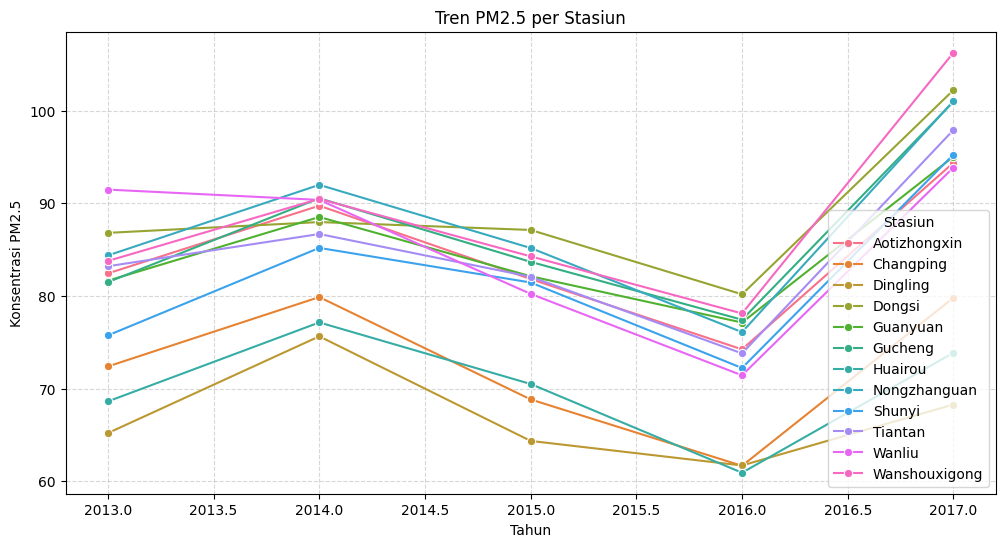

In [87]:
plt.figure(figsize=(12,6))
sns.lineplot(data=pm25_trend, x='year', y='PM2.5', hue='station', marker='o')

plt.title("Tren PM2.5 per Stasiun")
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi PM2.5")
plt.legend(title='Stasiun')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**2. Bagaimana pengaruh curah hujan terhadap PM2.5 di setiap daerah setiap tahunnya?**

In [134]:
air_polution = df.groupby(by= ['station', 'year']).agg({
    "PM2.5": "mean",
    "RAIN": "mean",
}).sort_values(by=['station'], ascending=True)
air_polution = air_polution.reset_index()
air_polution.rename(columns={
    "PM2.5": "avg_PM2.5",
    "RAIN": "avg_rain"
}, inplace=True)

air_polution.head()

,station,year,avg_PM2.5,avg_rain
0,Aotizhongxin,2013,82.439202,0.071582
1,Aotizhongxin,2014,89.747603,0.056610
2,Aotizhongxin,2015,81.831724,0.072671
3,Aotizhongxin,2016,74.236680,0.079702
4,Aotizhongxin,2017,94.379237,0.003107


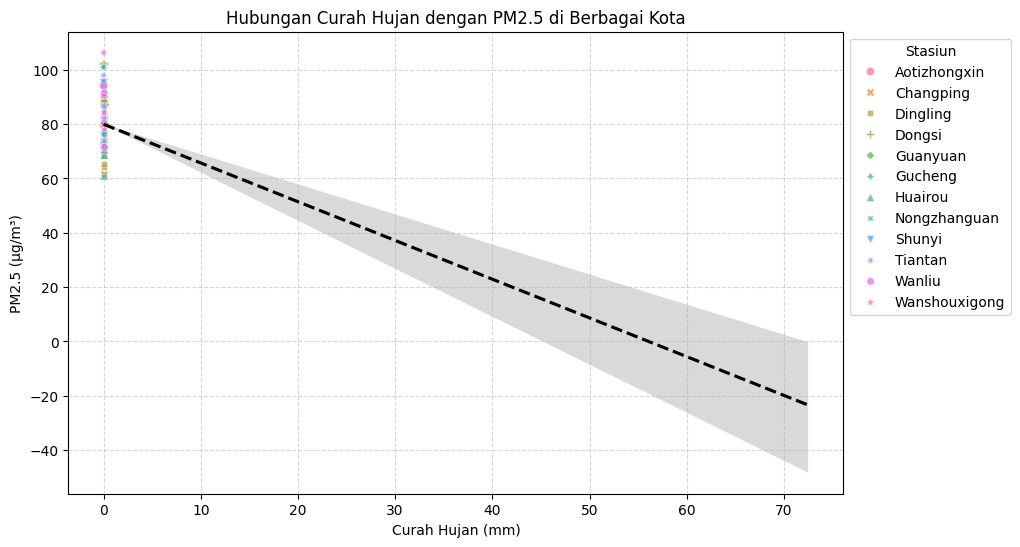

In [143]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=air_polution, x='avg_rain', y='avg_PM2.5', hue='station', style='station', alpha=0.7)

sns.regplot(data=df, x="RAIN", y='PM2.5', scatter=False, color='black', line_kws={'linestyle':'dashed'})

plt.title("Hubungan Curah Hujan dengan PM2.5 di Berbagai Kota")
plt.xlabel("Curah Hujan (mm)")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend(title='Stasiun', bbox_to_anchor=(1,1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Insight**
* Konsentrasi PM2.5 paling tinggi terjadi di tahun 2017. sebelumnya, pada tahun 2014 - 2016, sempat terjadi penurunan angka konsentrasi PM2.5 yang berarti kualitas udara sempat membaik. Namun pada tahun 2017, terjadi lonjakan kualitas udara yang memburuk.
* Semakin tinggi curah hujan, semakin rendah PM2.5. Sebaliknya, jika curah hujan rendah, maka PM2.5 semakin banyak. Ini menandakan bahwa, hujan dapat mengurangi polutan PM2.5. 

## **Teknik Analisis Lanjutan dengan RFM**

In [95]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   No       420768 non-null  int64         
 1   year     420768 non-null  int64         
 2   month    420768 non-null  int64         
 3   day      420768 non-null  int64         
 4   hour     420768 non-null  int64         
 5   PM2.5    420768 non-null  float64       
 6   PM10     420768 non-null  float64       
 7   SO2      420768 non-null  float64       
 8   NO2      420768 non-null  float64       
 9   CO       420768 non-null  float64       
 10  O3       420768 non-null  float64       
 11  TEMP     420768 non-null  float64       
 12  PRES     420768 non-null  float64       
 13  DEWP     420768 non-null  float64       
 14  RAIN     420768 non-null  float64       
 15  wd       420768 non-null  object        
 16  WSPM     420768 non-null  float64       
 17  station  4

In [ ]:
# polusi tinggi pada beberapa hari terakhir
recency = df[df['PM2.5'] > 100].groupby('station')['date'].max()
recency = (df['date'].max() - recency).dt.days

# berapa kali polusi tinggi terjadi dalam setahun
frequency = df[df['PM2.5'] > 100].groupby("station")['date'].count()

# rata-rata PM2.5 per statiun
magnitude = df.groupby('station')['PM2.5'].mean()


rfm = pd.DataFrame({"Recency":recency, "Frequency":frequency, "Magnitude":magnitude})

# skala nilai
rfm['R_Score'] = pd.cut(rfm['Recency'].rank(method='first'), bins=4, labels=[4,3,2,1])
rfm['F_Score'] = pd.cut(rfm['Frequency'].rank(method='first'), bins=4, labels=[1,2,3,4])
rfm['M_Score'] = pd.cut(rfm['Magnitude'].rank(method='first'), bins=4, labels=[1,2,3,4])

rfm["RFM_Score"] = rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)


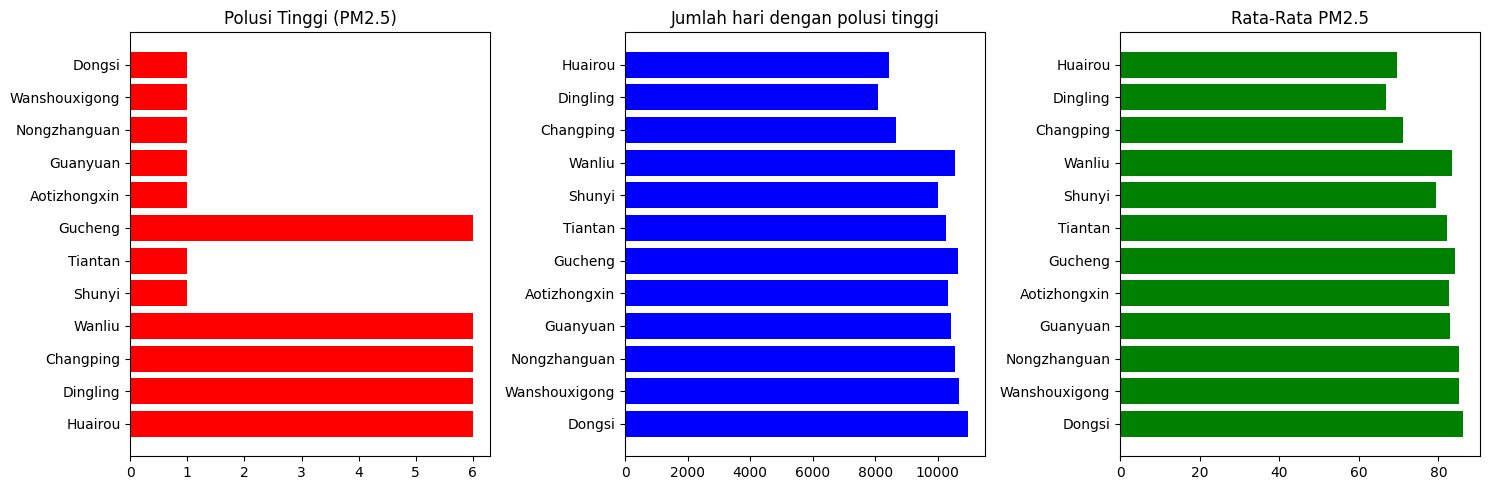

In [ ]:
rfm_sorted = rfm.sort_values("RFM_Score", ascending=False)

fig, axes = plt.subplots(1,3, figsize=(15,5))

axes[0].barh(rfm_sorted.index, rfm_sorted['Recency'], color='red')
axes[0].set_title("By Recency")
axes[0].invert_yaxis()

axes[1].barh(rfm_sorted.index, rfm_sorted['Frequency'], color='blue')
axes[1].set_title("By Frequency")

axes[2].barh(rfm_sorted.index, rfm_sorted['Magnitude'], color='green')
axes[2].set_title("By Monetary")

plt.tight_layout()
plt.show()

In [123]:
station_coords = {
    "Aotizhongxin": (39.982, 116.417),
    "Changping": (40.220, 116.231),
    "Dingling": (40.290, 116.220),
    "Dongsi": (39.929, 116.417),
    "Guanyuan": (39.933, 116.339),
    "Gucheng": (39.907, 116.152),
    "Huairou": (40.409, 116.630),
    "Nongzhanguan": (39.933, 116.461),
    "Shunyi": (40.128, 116.654),
    "Tiantan": (39.886, 116.421),
    "Wanliu": (39.974, 116.295),
    "Wanshouxigong": (39.886, 116.354)
}

In [128]:
import folium 
from folium.plugins import HeatMap

df['latitude'] = df['station'].map(lambda x: station_coords[x][0])
df['longitude'] = df['station'].map(lambda x: station_coords[x][1])

station_avg = df.groupby("station")[["PM2.5", "latitude", "longitude"]].mean().reset_index()

m = folium.Map(location=[station_avg['latitude'].mean(), station_avg['longitude'].mean()], zoom_start=10)

HeatMap(data=station_avg[['latitude', 'longitude', "PM2.5"]].values, radius=15).add_to(m)

m

## Conclusion

PM2.5 adalah partikel udara berukuran sangat kecil yang berbahaya bagi kesehatan. PM2.5 ini dapat dihubungkan dengan kualitas udara yang buruk. semakin tinggi kadar PM2.5, maka akan semakin buruk kualitas udara di suatu tempat tersebut. 

Dari visualisasi sebelumnya, konsentrasi PM2.5 paling tinggi terjadi di tahun 2017. sebelumnya, pada tahun 2014 - 2016, sempat terjadi penurunan angka konsentrasi PM2.5 yang berarti kualitas udara sempat membaik. Namun pada tahun 2017, terjadi lonjakan kualitas udara yang memburuk.

Sementara itu, kota yang paling buruk kualitas udaranya adalah Aotizhongxin, disusul kota Shunyi dan Dongsi. Kota yang paling baik kualitas udaranya adalah Dingling, Changping, dan Nongzhangua dibandinkan kota-kota lainnya. 

Curah hujan yang tinggi dapat mengembalikan kualitas udara menjadi lebih baik. 

Daerah dengan lahan hijau seperti hutan atau pedesaan memiliki kualitas udara yang lebih baik dibandingkan dengan daerah perkotaan yang padat penduduk. 

## Dashboard

In [130]:
df.to_csv("all_data.csv", index=False)